In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import math as math

In [2]:
questURL = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
Quest = requests.get(questURL).json()
Quest

{'StudyFieldsResponse': {'APIVrs': '1.01.02',
  'DataVrs': '2020:07:29 00:02:07.367',
  'Expression': 'covid 19',
  'NStudiesAvail': 347165,
  'NStudiesFound': 2925,
  'MinRank': 1,
  'MaxRank': 1,
  'NStudiesReturned': 1,
  'FieldList': ['NCTId',
   'BriefTitle',
   'StatusVerifiedDate',
   'CompletionDate',
   'OrgFullName',
   'OrgClass',
   'Keyword',
   'LocationCity',
   'LocationCountry',
   'EnrollmentCount',
   'StdAge',
   'Gender'],
  'StudyFields': [{'Rank': 1,
    'NCTId': ['NCT04395924'],
    'BriefTitle': ['Maternal-foetal Transmission of SARS-Cov-2'],
    'StatusVerifiedDate': ['June 2020'],
    'CompletionDate': ['May 2021'],
    'OrgFullName': ["Centre Hospitalier Régional d'Orléans"],
    'OrgClass': ['OTHER'],
    'Keyword': ['Pregnancy',
     'RT-PCR-COVID-19',
     'SARS-CoV 2 serologies',
     'Placenta',
     'Blood cord',
     'Amniotic fluid'],
    'LocationCity': ['Orléans'],
    'LocationCountry': ['France'],
    'EnrollmentCount': ['50'],
    'StdAge': ['Ad

In [3]:
limit1 = Quest['StudyFieldsResponse']['NStudiesFound'] #make sure we don't ask for results outside of the scope of our query
limit1

2925

In [4]:
tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'   
tempL1 = requests.get(tempURL1).json()

tempURL2 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk=2000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

tempURL3 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=2001\
           &max_rnk={limit1}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL3 = requests.get(tempURL3).json()

Q1_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q1_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']
Q1_tempL3 = tempL3['StudyFieldsResponse']['StudyFields']

In [5]:
Q1_tempDF1 = pd.DataFrame(Q1_tempL1)
Q1_tempDF2 = pd.DataFrame(Q1_tempL2)
Q1_tempDF3 = pd.DataFrame(Q1_tempL3)

In [6]:
def change_remove45(df):
    df = df.astype(str)
    df["NCTId"] = df["NCTId"].str.lstrip("['")
    df["NCTId"] = df["NCTId"].str.rstrip("']")
    df["BriefTitle"] = df["BriefTitle"].str.lstrip("['")
    df["BriefTitle"] = df["BriefTitle"].str.rstrip("']")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.lstrip("['")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.rstrip("']")
    df["CompletionDate"] = df["CompletionDate"].str.lstrip("['")
    df["CompletionDate"] = df["CompletionDate"].str.rstrip("']")
    df["OrgFullName"] = df["OrgFullName"].str.lstrip("['")
    df["OrgFullName"] = df["OrgFullName"].str.rstrip("']")
    df["OrgClass"] = df["OrgClass"].str.lstrip("['")
    df["OrgClass"] = df["OrgClass"].str.rstrip("']")
    df["Keyword"] = df["Keyword"].str.lstrip("['")
    df["Keyword"] = df["Keyword"].str.rstrip("']")
    df["LocationCity"] = df["LocationCity"].str.lstrip("['")
    df["LocationCity"] = df["LocationCity"].str.rstrip("']")
    df["LocationCountry"] = df["LocationCountry"].str.lstrip("['")
    df["LocationCountry"] = df["LocationCountry"].str.rstrip("']")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.lstrip("['")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.rstrip("']")
    df["StdAge"] = df["StdAge"].str.lstrip("['")
    df["StdAge"] = df["StdAge"].str.rstrip("']")
    df["Gender"] = df["Gender"].str.lstrip("['")
    df["Gender"] = df["Gender"].str.rstrip("']")
    df["LocationFacility"] = df["LocationFacility"].str.lstrip("['")
    df["LocationFacility"] = df["LocationFacility"].str.rstrip("']")
    df["StartDate"] = df["StartDate"].str.lstrip("['")
    df["StartDate"] = df["StartDate"].str.rstrip("']")
    df["LocationStatus"] = df["LocationStatus"].str.lstrip("['")
    df["LocationStatus"] = df["LocationStatus"].str.rstrip("']")
    df["NCTId"] = df["NCTId"].str.replace("'","")
    df["BriefTitle"] = df["BriefTitle"].str.replace("'","")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.replace("'","")
    df["CompletionDate"] = df["CompletionDate"].str.replace("'","")
    df["OrgFullName"] = df["OrgFullName"].str.replace("'","")
    df["OrgClass"] = df["OrgClass"].str.replace("'","")
    df["Keyword"] = df["Keyword"].str.replace("'","")
    df["LocationCity"] = df["LocationCity"].str.replace("'","")
    df["LocationCountry"] = df["LocationCountry"].str.replace("'","")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.replace("'","")
    df["StdAge"] = df["StdAge"].str.replace("'","")
    df["Gender"] = df["Gender"].str.replace("'","")
    df["StartDate"] = df["StartDate"].str.replace("'","")
    df["LocationFacility"] = df["LocationFacility"].str.replace("'","")
    df["LocationFacility"] = df["LocationStatus"].str.replace("'","")
    df["EnrollmentCount"] = pd.to_numeric(df["EnrollmentCount"])
    return df

In [7]:
clean_Q1_tempDF3 = change_remove45(Q1_tempDF3)
clean_Q1_tempDF3

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,2001,NCT04438863,Daily Home Spirometry for Early Detection of P...,June 2020,"September 1, 2020","September 1, 2021",Sheba Medical Center,OTHER_GOV,,,,,,90.0,"Adult, Older Adult",All
1,2002,NCT04418193,Patient Preference Trial for COVID-19 (PPT-COVID),June 2020,"April 6, 2020","September 1, 2020",Centre Hospitalier Princesse Grace,OTHER,,Recruiting,Recruiting,Monaco,Monaco,100.0,"Adult, Older Adult",All
2,2003,NCT04466982,Assessment of Olfactory Dysfunction in SARS Co...,July 2020,"July 2, 2020",January 2022,Cambridge University Hospitals NHS Foundation ...,OTHER,,"Recruiting, Recruiting, Recruiting","Recruiting', 'Recruiting', 'Recruiting","Cambridge, London, Truro","United Kingdom, United Kingdom, United Kingdom",90.0,"Adult, Older Adult",All
3,2004,NCT04382924,Safety and Efficacy of NP-120 (Ifenprodil) for...,May 2020,July 2020,February 2022,Algernon Pharmaceuticals,INDUSTRY,,,,,,682.0,"Adult, Older Adult",All
4,2005,NCT04355052,"Open Label Study to Compare Efficacy, Safety a...",April 2020,"April 11, 2020","December 11, 2020",Sheba Medical Center,OTHER_GOV,"COVID - 19, hydroxychloroquine, camostat mesylate","Recruiting, Recruiting","Recruiting', 'Recruiting","Ramat Gan, Tel HaShomer","Israel, Israel",250.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,2921,NCT03728257,Lung Transplant G0 (LTGO): Improving Self-Mana...,June 2020,"March 25, 2019","April 8, 2022",University of Pittsburgh,OTHER,,Recruiting,Recruiting,Pittsburgh,United States,112.0,"Adult, Older Adult",All
921,2922,NCT03823469,Evaluating the Impact of a Culinary Coaching T...,May 2020,"May 20, 2019",February 2022,Spaulding Rehabilitation Hospital,OTHER,"Home cooking, Telemedicine, Nutrition, Health ...","Completed, Recruiting","Completed', 'Recruiting","Charlestown, Ramat Gan","United States, Israel",78.0,"Adult, Older Adult",All
922,2923,NCT04429061,Reaching 90 90 90 in Adolescents in Zambia: Us...,June 2020,"March 1, 2020","June 30, 2023",University of Alabama at Birmingham,OTHER,"Adolescents, Zambia, Football",Recruiting,Recruiting,Lusaka,Zambia,3200.0,"Child, Adult, Older Adult",Female
923,2924,NCT03922334,Navigating New Motherhood 2,June 2020,"January 21, 2020",December 2024,Northwestern University,OTHER,,Recruiting,Recruiting,Chicago,United States,400.0,"Child, Adult",Female


In [8]:
clean_Q1_tempDF2 = change_remove45(Q1_tempDF2)
clean_Q1_tempDF2

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1001,NCT04338828,Nitric Oxide Inhalation Therapy for COVID-19 I...,May 2020,"April 18, 2020",April 2022,Massachusetts General Hospital,OTHER,"inhaled nitric oxide, emergency department, em...",Recruiting,Recruiting,Boston,United States,260.0,"Adult, Older Adult",All
1,1002,NCT04394104,COVID-19 Wellness Survey,May 2020,"May 27, 2020","May 31, 2020","Rutgers, The State University of New Jersey",OTHER,,,,New Brunswick,United States,1000.0,"Adult, Older Adult",All
2,1003,NCT04420247,Efficacy of Chloroquine or Hydroxychloroquine ...,June 2020,"April 16, 2020","August 31, 2020",Centro de Estudos e Pesquisa em Emergencias Me...,OTHER,"VIRAL PNEUMONIA, CORONAVIRUS, COVID-19, COVID,...",Recruiting,Recruiting,Curitiba,Brazil,100.0,"Adult, Older Adult",All
3,1004,NCT04470622,Aprepitant Injectable Emulsion in Patients Wit...,July 2020,July 2020,October 2020,Heron Therapeutics,INDUSTRY,"COVID-19, Coronavirus","Recruiting, Not yet recruiting, Recruiting, Re...","Recruiting', 'Not yet recruiting', 'Recruiting...","Sheffield, New Haven, Houston, Ponce","United States, United States, United States, P...",100.0,"Adult, Older Adult",All
4,1005,NCT04397718,Hormonal Intervention for the Treatment in Vet...,July 2020,"July 6, 2020","December 6, 2020",VA Office of Research and Development,FED,,"Recruiting, Recruiting, Recruiting, Recruiting","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","West Los Angeles, Brooklyn, New York, Seattle","United States, United States, United States, U...",198.0,"Adult, Older Adult",Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1996,NCT04370210,Sleep Quality During COVID-19 Containment in C...,April 2020,"May 4, 2020","June 4, 2020",Centre Hospitalier René Dubos,OTHER,"Children, Sleep Disturbance scale for children...",,,Pontoise,France,247.0,Child,All
996,1997,NCT04424056,"A Trial Using ANAKINRA, TOCILIZUMAB Alone or i...",June 2020,"September 1, 2020","November 1, 2022",Assistance Publique Hopitaux De Marseille,OTHER,,,,Marseille,France,216.0,"Adult, Older Adult",All
997,1998,NCT04371562,Predicting Death and ICU Admission in COVID-19...,April 2020,"March 1, 2020","April 15, 2020",Fondazione Policlinico Universitario Agostino ...,OTHER,"Early -Warning Scores, NEWS, NEWS2, qSOFA, REM...",,,Roma,Italy,300.0,"Adult, Older Adult",All
998,1999,NCT04349410,The Fleming [FMTVDM] Directed CoVid-19 Treatme...,July 2020,"April 11, 2020","November 11, 2020",The Camelot Foundation,OTHER,,,,Los Angeles,United States,500.0,"Child, Adult, Older Adult",All


In [9]:

clean_Q1_tempDF1 = change_remove45(Q1_tempDF1)
clean_Q1_tempDF1

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
1,2,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04367805,COVID-19 Infection in Patients With Hepatocell...,April 2020,"April 27, 2020",October 2020,"Centre Hospitalier Universitaire, Amiens",OTHER,"Hepatocellular Carcinoma, COVID-19, Coronaviru...",Recruiting,Recruiting,Amiens,France,50.0,"Adult, Older Adult",All
4,5,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,NCT04360278,Plasma Collection From Convalescent and/or Imm...,"June 4, 2020","April 21, 2020","April 14, 2030",National Institutes of Health Clinical Center ...,NIH,"Titer, Antibodies",Recruiting,Recruiting,Bethesda,United States,1500.0,"Adult, Older Adult",All
996,997,NCT04426279,Morbimortality of Covid-19 in Patients With Ch...,June 2020,August 2020,December 2020,"University Hospital, Lille",OTHER,"Immunotherapy, chronic inflammatory rheumatism",,,,,1500.0,"Adult, Older Adult",All
997,998,NCT04316884,Mechanisms for Organ Dysfunction in Covid-19,March 2020,"March 12, 2020","December 31, 2021",Uppsala University,OTHER,,Recruiting,Recruiting,Uppsala,Sweden,100.0,"Adult, Older Adult",All
998,999,NCT04369807,Mapping Organ Health Following COVID-19 Diseas...,April 2020,"April 21, 2020","May 31, 2023",Perspectum Diagnostics Ltd,INDUSTRY,"Metabolic Syndrome, Obesity, Fatty Liver Disease","Not yet recruiting, Recruiting","Not yet recruiting', 'Recruiting","London, Oxford","United Kingdom, United Kingdom",507.0,"Adult, Older Adult",All


In [10]:
query = 'coronavirus'
quest2URL = f'http://ClinicalTrials.gov/api/query/study_fields?expr={query}\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
Quest2 = requests.get(quest2URL).json()
Quest2

{'StudyFieldsResponse': {'APIVrs': '1.01.02',
  'DataVrs': '2020:07:29 00:02:07.367',
  'Expression': 'coronavirus',
  'NStudiesAvail': 347165,
  'NStudiesFound': 1481,
  'MinRank': 1,
  'MaxRank': 1,
  'NStudiesReturned': 1,
  'FieldList': ['NCTId',
   'BriefTitle',
   'StatusVerifiedDate',
   'StartDate',
   'CompletionDate',
   'OrgFullName',
   'OrgClass',
   'Keyword',
   'LocationFacility',
   'LocationStatus',
   'LocationCity',
   'LocationCountry',
   'EnrollmentCount',
   'StdAge',
   'Gender'],
  'StudyFields': [{'Rank': 1,
    'NCTId': ['NCT04279795'],
    'BriefTitle': ['Detection of 2019 Novel Coronavirus in Multiple Organ System and Its Relationship With Clinical Manifestations'],
    'StatusVerifiedDate': ['February 2020'],
    'StartDate': ['January 20, 2020'],
    'CompletionDate': ['February 28, 2021'],
    'OrgFullName': ['Third Affiliated Hospital, Sun Yat-Sen University'],
    'OrgClass': ['OTHER'],
    'Keyword': ['2019 Novel Coronavirus'],
    'LocationFacility'

In [11]:
limit2 = Quest2['StudyFieldsResponse']['NStudiesFound'] #make sure we don't ask for results outside of the scope of our query
limit2

1481

In [12]:
tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'   

tempL1 = requests.get(tempURL1).json()

tempURL2 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk={limit2}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

Q2_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q2_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']

In [13]:
Q2_tempDF1 = pd.DataFrame(Q2_tempL1)
Q2_tempDF2 = pd.DataFrame(Q2_tempL2)

In [14]:
clean_Q2_tempDF1 = change_remove45(Q2_tempDF1)
clean_Q2_tempDF1

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
1,2,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04367805,COVID-19 Infection in Patients With Hepatocell...,April 2020,"April 27, 2020",October 2020,"Centre Hospitalier Universitaire, Amiens",OTHER,"Hepatocellular Carcinoma, COVID-19, Coronaviru...",Recruiting,Recruiting,Amiens,France,50.0,"Adult, Older Adult",All
4,5,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,NCT04449380,Clinical Study for the Treatment With Interfer...,July 2020,September 2020,June 2021,IRCCS San Raffaele,OTHER,,,,Milano,Italy,126.0,"Adult, Older Adult",All
996,997,NCT04459689,COVID-19 in PID Survey,July 2020,"March 15, 2020","March 31, 2022",Imagine Institute,OTHER,,Recruiting,Recruiting,Paris,France,200.0,"Child, Adult, Older Adult",All
997,998,NCT04335188,COVID-19 Registry Rhineland-Palatinate (Germany),March 2020,"April 6, 2020","September 30, 2021",IHF GmbH - Institut für Herzinfarktforschung,OTHER,,Recruiting,Recruiting,Ludwigshafen,Germany,4000.0,"Child, Adult, Older Adult",All
998,999,NCT04362085,Coagulopathy of COVID-19: A Pragmatic Randomiz...,May 2020,"May 11, 2020",December 2020,"""St. Michaels Hospital, Toronto""",OTHER,"coagulopathy, anticoagulation",Recruiting,Recruiting,Toronto,Canada,462.0,"Adult, Older Adult",All


In [15]:
clean_Q2_tempDF2 = change_remove45(Q2_tempDF2)
clean_Q2_tempDF2

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1001,NCT04470739,Is Thymus Size of Infants Who Born to COVID-19...,July 2020,"May 30, 2020","October 30, 2020",Kanuni Sultan Suleyman Training and Research H...,OTHER,,Recruiting,Recruiting,Istanbul,Turkey,20.0,Child,All
1,1002,NCT04383886,Evaluation of Emergency Department (ED) Staff ...,April 2020,"April 18, 2020","August 18, 2020",Hospices Civils de Lyon,OTHER,"COVID-19 pandemic, level of stress, emergency ...","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Lyon, Lyon, Lyon, Pierre-Bénite, Villefranche-...","France, France, France, France, France",200.0,"Adult, Older Adult",All
2,1003,NCT04477655,Prone Positioning in Non-intubated Patients Wi...,July 2020,"May 3, 2020","December 30, 2020",Hospital Civil de Guadalajara,OTHER,"COVID-19, Severe, Prone positioning, High-flow...","Recruiting, Not yet recruiting","Recruiting', 'Not yet recruiting","Guadalajara, Guadalajara","Mexico, Mexico",200.0,"Adult, Older Adult",All
3,1004,NCT04344197,Surgery During Covid-19: The Role of Asymptoma...,April 2020,"April 2, 2020","April 15, 2020",University of Rome Tor Vergata,OTHER,,,,Rome,Italy,1200.0,"Child, Adult, Older Adult",All
4,1005,NCT04344327,Early Risk Stratification of Patient Hospitali...,April 2020,"April 10, 2020","April 21, 2020",French Cardiology Society,OTHER,"Cardiology department, Medicine conventional d...",,,"Amiens, Annecy, Bordeaux, Caen, Cherbourg, Dij...","France, France, France, France, France, France...",2878.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,1477,NCT04270383,Clinical Characteristics and Long-term Prognos...,February 2020,"February 15, 2020","December 31, 2020","""Beijing Childrens Hospital""",OTHER,"2019-nCoV infection, 2019-nCoV pneumonia, Chil...",,,Beijing,China,500.0,"Child, Adult",All
477,1478,NCT04385914,Demographics and Outcomes of COVID 19 in Pregn...,May 2020,May 2020,December 2020,Atlantic Health System,OTHER,,,,,,200.0,Adult,Female
478,1479,NCT04405843,Efficacy of Ivermectin in Adult Patients With ...,July 2020,"July 14, 2020","December 14, 2020",Centro de Estudios en Infectogía Pediatrica,OTHER,,Recruiting,Recruiting,Cali,Colombia,400.0,"Adult, Older Adult",All
479,1480,NCT04360486,Treatment Of CORONAVIRUS DISEASE 2019 (COVID-1...,April 2020,,,U.S. Army Medical Research and Development Com...,FED,,,,,,NaN,"Child, Adult, Older Adult",All


In [16]:
DF_QQ = pd.concat([clean_Q1_tempDF1, clean_Q1_tempDF2, clean_Q1_tempDF3, clean_Q2_tempDF1, clean_Q2_tempDF2], ignore_index=True)
DF_QQ = DF_QQ.drop_duplicates()
DF_QQ

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
1,2,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04367805,COVID-19 Infection in Patients With Hepatocell...,April 2020,"April 27, 2020",October 2020,"Centre Hospitalier Universitaire, Amiens",OTHER,"Hepatocellular Carcinoma, COVID-19, Coronaviru...",Recruiting,Recruiting,Amiens,France,50.0,"Adult, Older Adult",All
4,5,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,1477,NCT04270383,Clinical Characteristics and Long-term Prognos...,February 2020,"February 15, 2020","December 31, 2020","""Beijing Childrens Hospital""",OTHER,"2019-nCoV infection, 2019-nCoV pneumonia, Chil...",,,Beijing,China,500.0,"Child, Adult",All
4402,1478,NCT04385914,Demographics and Outcomes of COVID 19 in Pregn...,May 2020,May 2020,December 2020,Atlantic Health System,OTHER,,,,,,200.0,Adult,Female
4403,1479,NCT04405843,Efficacy of Ivermectin in Adult Patients With ...,July 2020,"July 14, 2020","December 14, 2020",Centro de Estudios en Infectogía Pediatrica,OTHER,,Recruiting,Recruiting,Cali,Colombia,400.0,"Adult, Older Adult",All
4404,1480,NCT04360486,Treatment Of CORONAVIRUS DISEASE 2019 (COVID-1...,April 2020,,,U.S. Army Medical Research and Development Com...,FED,,,,,,NaN,"Child, Adult, Older Adult",All


In [17]:

dupe_dupe = DF_QQ.pivot_table(index=['NCTId'], aggfunc='size')
print (dupe_dupe)

NCTId
NCT01306084    1
NCT02517489    1
NCT02656381    1
NCT02735707    1
NCT02765191    1
              ..
NCT04491214    1
NCT04491227    1
NCT04491240    2
NCT04491292    2
NCT04491318    1
Length: 2895, dtype: int64


In [18]:
df_final = DF_QQ.drop_duplicates(subset='NCTId', keep="first")
df_final

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
1,2,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04367805,COVID-19 Infection in Patients With Hepatocell...,April 2020,"April 27, 2020",October 2020,"Centre Hospitalier Universitaire, Amiens",OTHER,"Hepatocellular Carcinoma, COVID-19, Coronaviru...",Recruiting,Recruiting,Amiens,France,50.0,"Adult, Older Adult",All
4,5,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,1192,NCT04346342,PRactice of VENTilation in COVID-19 Patients (...,July 2020,"March 6, 2020","October 1, 2020",Academisch Medisch Centrum - Universiteit van ...,OTHER,COVID,"Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Almere, Amsterdam, Amsterdam, Apeldoorn, Arnhe...","Netherlands, Netherlands, Netherlands, Netherl...",1000.0,"Adult, Older Adult",All
4119,1195,NCT04438993,The COVID-19 Disease and CARdiac Events Study,June 2020,"May 29, 2020",November 2020,NHS Lanarkshire,OTHER_GOV,"Echocardiogram, Troponin, NT-proBNP, Cytokines",Recruiting,Recruiting,Glasgow,United Kingdom,100.0,"Adult, Older Adult",All
4120,1196,NCT04320277,Baricitinib in Symptomatic Patients Infected b...,April 2020,"May 16, 2020","July 30, 2020",Hospital of Prato,OTHER,"COVID-19, Baricitinib, Moderate disease, Infec...",,,Prato,Italy,200.0,"Adult, Older Adult",All
4137,1213,NCT04341142,Assessment of Serological Techniques for Scree...,July 2020,"April 9, 2020","September 9, 2020",Hospices Civils de Lyon,OTHER,,Recruiting,Recruiting,Pierre-Bénite cedex,France,550.0,"Adult, Older Adult",All


In [19]:
df_final.set_index('NCTId', inplace=True)
df_final

,Rank,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
NCTId,,,,,,,,,,,,,,,
NCT04395924,1,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
NCT04395482,2,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
NCT04476940,3,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
NCT04367805,4,COVID-19 Infection in Patients With Hepatocell...,April 2020,"April 27, 2020",October 2020,"Centre Hospitalier Universitaire, Amiens",OTHER,"Hepatocellular Carcinoma, COVID-19, Coronaviru...",Recruiting,Recruiting,Amiens,France,50.0,"Adult, Older Adult",All
NCT04412265,5,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT04346342,1192,PRactice of VENTilation in COVID-19 Patients (...,July 2020,"March 6, 2020","October 1, 2020",Academisch Medisch Centrum - Universiteit van ...,OTHER,COVID,"Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Almere, Amsterdam, Amsterdam, Apeldoorn, Arnhe...","Netherlands, Netherlands, Netherlands, Netherl...",1000.0,"Adult, Older Adult",All
NCT04438993,1195,The COVID-19 Disease and CARdiac Events Study,June 2020,"May 29, 2020",November 2020,NHS Lanarkshire,OTHER_GOV,"Echocardiogram, Troponin, NT-proBNP, Cytokines",Recruiting,Recruiting,Glasgow,United Kingdom,100.0,"Adult, Older Adult",All
NCT04320277,1196,Baricitinib in Symptomatic Patients Infected b...,April 2020,"May 16, 2020","July 30, 2020",Hospital of Prato,OTHER,"COVID-19, Baricitinib, Moderate disease, Infec...",,,Prato,Italy,200.0,"Adult, Older Adult",All


In [28]:
#Create p_keywords (ID, Keyword)
temp_df_final = df_final
temp_df_final.reset_index(inplace=True)

In [30]:
p_Keywords = df_final[['NCTId', 'Keyword']]

In [47]:
p_keysList = []
for key in p_Keywords['Keyword']:
    key = key.replace(' ', '')
    key = key.split(',')
    p_keysList.append(key)
p_id_list = []
for i in p_Keywords['NCTId']:
    p_id_list.append(i)

In [55]:
tdf = pd.DataFrame()
tdf.insert(0, 'ID', p_id_list)
tdf.insert(1, 'Keyword', p_keysList)
p_Keywords = tdf
p_Keywords

,ID,Keyword
0,NCT04395924,"[Pregnancy, RT-PCR-COVID-19, SARS-CoV2serologi..."
1,NCT04395482,"[Lunginjury, sars-covid-2, coronavirusinfection]"
2,NCT04476940,"[COVID-19, ExclusiveBreastfeeding, Breastfeedi..."
3,NCT04367805,"[HepatocellularCarcinoma, COVID-19, Coronaviru..."
4,NCT04412265,"[Coronavirus, sars-covid-2, coronavirusinfecti..."
...,...,...
2890,NCT04346342,[COVID]
2891,NCT04438993,"[Echocardiogram, Troponin, NT-proBNP, Cytokines]"
2892,NCT04320277,"[COVID-19, Baricitinib, Moderatedisease, Infec..."
2893,NCT04341142,[]


In [56]:
#Remove empty Keyword fields
for i, k in enumerate(p_Keywords['Keyword']):
    if len(k) == 1:
        if k[0] == '':
            p_Keywords.drop(i, axis=0, inplace=True)

p_Keywords

,ID,Keyword
0,NCT04395924,"[Pregnancy, RT-PCR-COVID-19, SARS-CoV2serologi..."
1,NCT04395482,"[Lunginjury, sars-covid-2, coronavirusinfection]"
2,NCT04476940,"[COVID-19, ExclusiveBreastfeeding, Breastfeedi..."
3,NCT04367805,"[HepatocellularCarcinoma, COVID-19, Coronaviru..."
4,NCT04412265,"[Coronavirus, sars-covid-2, coronavirusinfecti..."
...,...,...
2888,NCT04453553,[COVID-19]
2890,NCT04346342,[COVID]
2891,NCT04438993,"[Echocardiogram, Troponin, NT-proBNP, Cytokines]"
2892,NCT04320277,"[COVID-19, Baricitinib, Moderatedisease, Infec..."


In [71]:
p_all_words = pd.DataFrame()
p_wordsList = []
for k in p_Keywords['Keyword']:
    for word in k:
        new_word = word.lower()
        new_word = new_word.replace('-', ' ')
        if new_word == 'covid19':
            new_word = 'covid 19'
        elif new_word == 'coronavirusdisease2019':
            new_word = 'covid 19'
        elif new_word == 'sarscov2':
            new_word = 'sars cov 2'
        elif new_word == 'icu':
            new_word = 'intensive care unit'
        elif new_word == 'covid19pneumonia':
            p_wordsList.append('covid 19')
            new_word = 'pneumonia'
        elif new_word == 'acuterespiratorydistresssyndrome':
            new_word = 'ards'
        elif new_word == 'severeacuterespiratorysyndromecoronavirus2':
            new_word == 'sars cov 2'
            
        p_wordsList.append(new_word)
        
p_all_words.insert(0, 'Word', p_wordsList)

p_wordsCount = p_all_words.pivot_table(index=['Word'], aggfunc='size')
p_wordsCount = p_wordsCount.sort_values(ascending=False)
p_wordCountDF = pd.DataFrame(p_wordsCount)
p_wordCountDF.rename(columns={0:'Count'}, inplace=True)

In [72]:
p_wordCountDF.head(30)

,Count
Word,
covid 19,976
sars cov 2,319
coronavirus,229
ards,107
covid,73
hydroxychloroquine,73
pneumonia,70
sars cov2,66
convalescentplasma,41


In [73]:
#Drop covid-19 and related words from DF
p_wordCountDF.drop(['covid 19', 'sars cov 2', 'coronavirus', 'covid', 'severeacuterespiratorysyndromecoronavirus2', '2019ncov', 'sars', 'novelcoronavirus', 'coronavirusinfection', 'sars cov2'], inplace=True)

In [74]:
p_wordCountDF.reset_index(inplace=True)

In [75]:
# Color palette for plots
p_colors = ['lightcoral', 'paleturquoise', 'palegoldenrod', 'plum', 'mediumaquamarine', 'sandybrown', 'mediumspringgreen', 'lightslategrey', 'palevioletred', ]

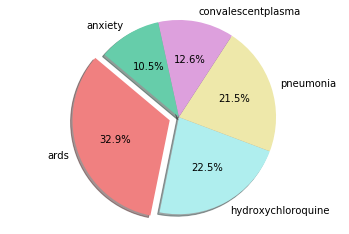

In [76]:
# Plot the top five keywords by frequency
l = 5
explode = [0]*l
explode[0] = 0.1
plt.pie(p_wordCountDF['Count'][:l], labels=p_wordCountDF['Word'][:l], colors = p_colors[:l],
         explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

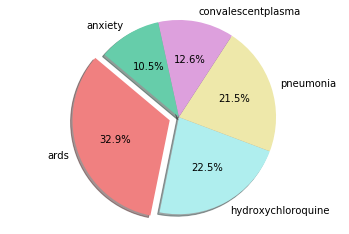

In [77]:
#Ok, now display the top 5 keywords by frequency
l = 5
explode = [0]*l
explode[0] = 0.1
plt.pie(p_wordCountDF['Count'][:l], labels=p_wordCountDF['Word'][:l], colors = p_colors[:l],
         explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

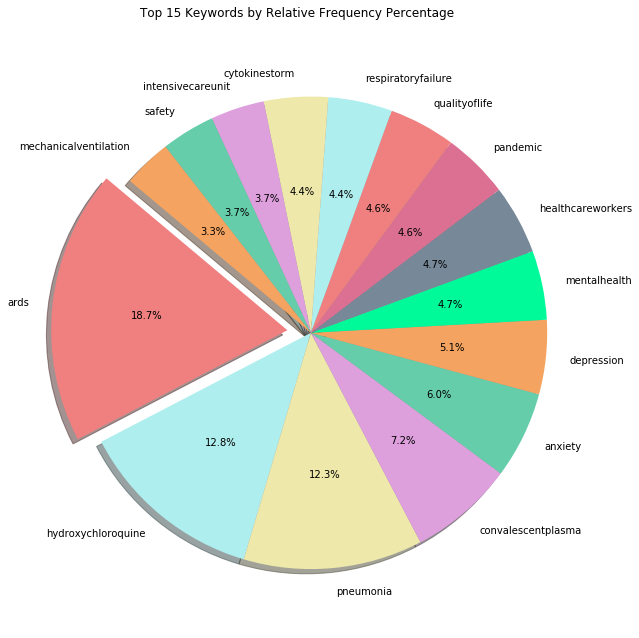

In [78]:
# Top 15
l = 15
explode = [0]*l
explode[0] = 0.1
plt.pie(p_wordCountDF['Count'][:l], labels=p_wordCountDF['Word'][:l], colors=p_colors[:l],
         explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title(f'Top {l} Keywords by Relative Frequency Percentage', pad=20)
plt.gcf().set_size_inches(9, 9)
#plt.savefig(f'Top_{l}_keywords_rel_freq.png', format='png', quality=95)
plt.tight_layout()
plt.show()

In [79]:
#Pareto Chart of top 15 keywords
l = 15
#cumulitive frequency sum
p_c_list = p_wordCountDF['Count'].cumsum()
p_c_list = p_c_list/p_wordCountDF['Count'].sum()*100
p_c_list

0         2.086177
1         3.509456
2         4.874244
3         5.673621
4         6.336518
           ...    
2836     99.922012
2837     99.941509
2838     99.961006
2839     99.980503
2840    100.000000
Name: Count, Length: 2841, dtype: float64

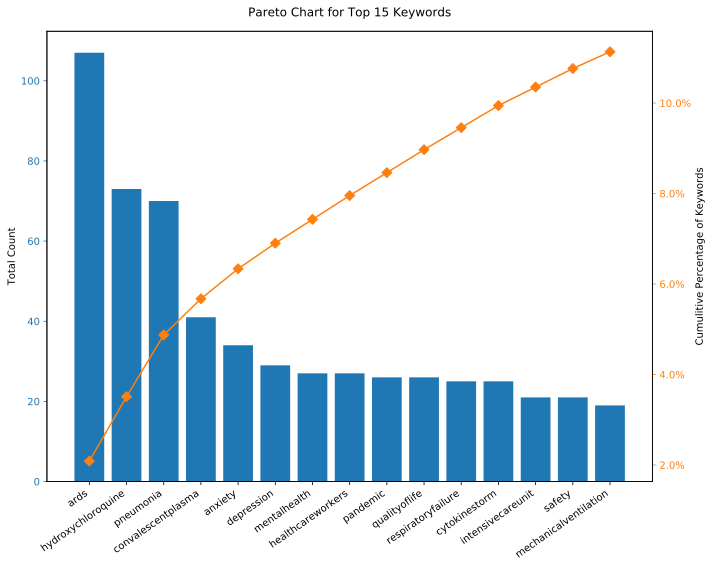

In [80]:
l = 15
fig, ax = plt.subplots()
ax.bar(p_wordCountDF['Word'][:l], p_wordCountDF['Count'][:l], color="C0")
ax2 = ax.twinx()
ax2.plot(p_wordCountDF['Word'][:l], p_c_list[:l], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(tk.PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.gcf().set_size_inches(10, 8)
%config InlineBackend.figure_format = 'svg'
ax.set_xticklabels(p_wordCountDF['Word'][:l], rotation=35, ha='right')
plt.title(f'Pareto Chart for Top {l} Keywords', pad=15)
plt.ylabel('Cumulitive Percentage of Keywords')
ax.set_ylabel('Total Count')
#plt.savefig(f'Pareto_Chart_for_Top_{l}_Keywords.png', format='png')
plt.tight_layout()
plt.show()
